In [1]:
import pandas as pd
import numpy as np
import string
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df  = pd.read_csv("train.csv")
df5 = pd.read_csv("test.csv")

In [3]:
#df1.Age = df.Age.fillna(df.Age.mean())  # changes only in age where mean(age) is taken and it is substituted in Nan 
#df.Age = df.Age.astype(int)
#df.Fare = df.Fare.astype(int)
df.Age = df['Age'].fillna(df['Age'].mean())
df1 = df
names = ['Passengerid','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

In [4]:

for Cabin in df1.columns:
    df1[Cabin].fillna(df1[Cabin].mode()[0],inplace=True)

In [5]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [6]:
# Finding correlation between data

/usr/local/lib/python2.7/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


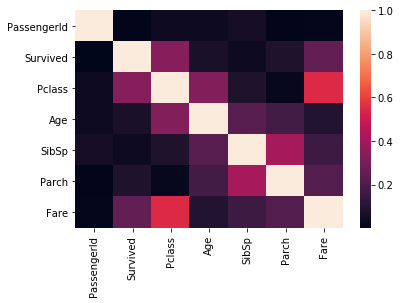

In [7]:
corr = df1.corr()
sns.heatmap(corr.abs())

In [8]:
# Applying Feature Engineering

In [9]:
def replace_titles(x):
    title = x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'

In [10]:
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if string.find(big_string, substring) != -1:
            return substring
    print big_string
    return np.nan

In [11]:
title_list=['Mrs','Mr','Master','Miss','Major','Rev','Dr','Ms','Mlle','Col','Capt','Mme','Countess','Don','Jonkheer']
df1['Title']=df1['Name'].map(lambda x: substrings_in_string(x, title_list))

In [12]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,Mr


In [13]:
df2 = df1

In [14]:
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
df2['Deck']= df2['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))

In [15]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,Mr,B
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,Miss,B
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,Mr,B


In [16]:
y = df2.Survived  # seperated labels
X = df2.loc[:, df2.columns != 'Survived']

In [17]:
#X.Age = X.Age.astype(int)
#X.Fare = X.Fare.astype(int)
#X.head()

In [18]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,Mr,B
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,Miss,B
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,C
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,Mr,B


In [19]:
X  = X.loc[:, X.columns != 'Name']
X  = X.loc[:, X.columns != 'Ticket']
X  = X.loc[:, X.columns != 'Cabin']
X  = X.loc[:, X.columns != 'Title']
X  = X.loc[:, X.columns != 'Deck']
X  = X.loc[:, X.columns != 'Embarked']
X  = X.loc[:, X.columns != 'Age']
X  = X.loc[:, X.columns != 'Fare']
X.Sex=X['Sex'].replace(['male'],0)
X.Sex=X['Sex'].replace(['female'],1)
X.head()


,PassengerId,Pclass,Sex,SibSp,Parch
0,1,3,0,1,0
1,2,1,1,1,0
2,3,3,1,0,0
3,4,1,1,1,0
4,5,3,0,0,0


In [20]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [21]:
# feature engg on prediction data

#df5.Age = df5.Age.astype(int)
#df5.Fare = df5.Fare.astype(int)
df5.Age = df5['Age'].fillna(df5['Age'].mean())
for Cabin in df5.columns:
    df5[Cabin].fillna(df5[Cabin].mode()[0],inplace=True)
df5['Title'] = df5['Name'].map(lambda x: substrings_in_string(x, title_list))
df5['Deck']  = df5['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))

In [22]:
df5

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,B57 B59 B63 B66,Q,Mr,B
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,B57 B59 B63 B66,S,Mrs,B
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,B57 B59 B63 B66,Q,Mr,B
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,B57 B59 B63 B66,S,Mr,B
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,B57 B59 B63 B66,S,Mrs,B
5,897,3,"Svensson, Mr. Johan Cervin",male,14.00000,0,0,7538,9.2250,B57 B59 B63 B66,S,Mr,B
6,898,3,"Connolly, Miss. Kate",female,30.00000,0,0,330972,7.6292,B57 B59 B63 B66,Q,Miss,B
7,899,2,"Caldwell, Mr. Albert Francis",male,26.00000,1,1,248738,29.0000,B57 B59 B63 B66,S,Mr,B
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00000,0,0,2657,7.2292,B57 B59 B63 B66,C,Mrs,B
9,901,3,"Davies, Mr. John Samuel",male,21.00000,2,0,A/4 48871,24.1500,B57 B59 B63 B66,S,Mr,B


In [23]:
df5  = df5.loc[:, df5.columns != 'Name']
df5  = df5.loc[:, df5.columns != 'Ticket']
df5  = df5.loc[:, df5.columns != 'Cabin']
df5  = df5.loc[:, df5.columns != 'Title']
df5  = df5.loc[:, df5.columns != 'Deck']
df5  = df5.loc[:, df5.columns != 'Embarked']
df5  = df5.loc[:, df5.columns != 'Age']
df5  = df5.loc[:, df5.columns != 'Fare']
df5.Sex = df5['Sex'].replace(['male'],0)
df5.Sex = df5['Sex'].replace(['female'],1)
df5.head()

,PassengerId,Pclass,Sex,SibSp,Parch
0,892,3,0,0,0
1,893,3,1,1,0
2,894,2,0,0,0
3,895,3,0,0,0
4,896,3,1,1,1


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [25]:
clf = SVC()
clf = svm.SVC(kernel='linear',C = 1.0,gamma ='auto')
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test) 

0.7966101694915254

In [27]:
predict=clf.predict(X_test)
y_pred = predict
y_true = y_test
accuracy_score(y_true, y_pred)

0.7966101694915254

In [28]:
filename = 'accuracy79.sav'  # edit filename
pickle.dump(clf, open(filename, 'wb'))

In [29]:
clf = pickle.load(open("accuracy79.sav", 'rb'))
predict = clf.predict(df5)
y_pred = predict
print(y_pred)


[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [30]:
for x in y_pred:
    if x == 1:
        print("survived")
    else:
        print("dead")
    

dead
survived
dead
dead
survived
dead
survived
dead
survived
dead
dead
dead
survived
dead
survived
survived
dead
dead
survived
survived
dead
dead
survived
dead
survived
dead
survived
dead
dead
dead
dead
dead
survived
survived
dead
dead
survived
survived
dead
dead
dead
dead
dead
survived
survived
dead
dead
dead
survived
survived
dead
dead
survived
survived
dead
dead
dead
dead
dead
survived
dead
dead
dead
survived
dead
survived
survived
dead
dead
survived
survived
dead
survived
dead
survived
dead
dead
survived
dead
survived
dead
dead
dead
dead
dead
dead
survived
survived
survived
dead
survived
dead
survived
dead
dead
dead
survived
dead
survived
dead
survived
dead
dead
dead
survived
dead
dead
dead
dead
dead
dead
survived
survived
survived
survived
dead
dead
survived
dead
survived
survived
dead
survived
dead
dead
survived
dead
survived
dead
dead
dead
dead
survived
dead
dead
dead
dead
dead
survived
dead
survived
survived
dead
dead
dead
dead
dead
dead
dead
dead
survived
dead
dead
survived
de

In [31]:
output = pd.DataFrame(columns=['PassengerId','Survived'])
output.PassengerId = df5.PassengerId
output.Survived = y_pred

In [32]:
with open("predicted.csv", 'a') as f:
    #f.write("col"+"\t")
    f.write('PassengerId'+"\t")
    f.write('Survived')
    f.write("\n")
    f.close()
with open("predicted.csv", 'a') as f:
    output.to_csv(f,header=False)